In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:05<00:00, 4589768.31it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 197296.20it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1788767.09it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22704812.82it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

(-0.5, 27.5, 27.5, -0.5)

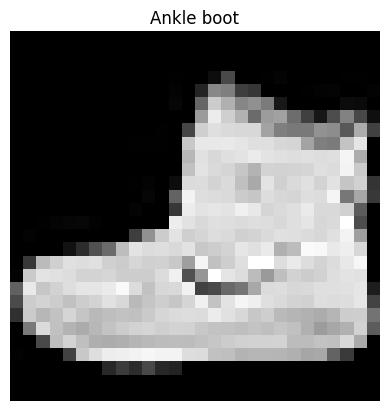

In [ ]:
import matplotlib.pyplot as plt
image,label=train_data[0]
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)

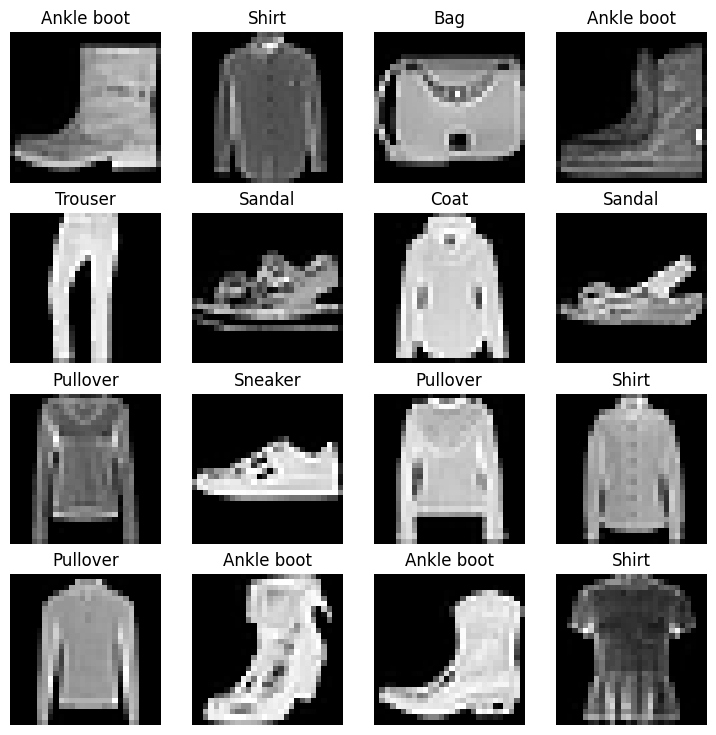

In [ ]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),(1,)).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_name[label])
    plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader
train_dataloader=DataLoader(train_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=32,shuffle=True)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cc44b96b760>,
 <torch.utils.data.dataloader.DataLoader at 0x7cc44b969150>)

In [ ]:
print(f"Dtaloader:{train_dataloader}\nLength:{len(train_dataloader)}\nType:{type(train_dataloader)}")
print(f"Dataloader:{test_dataloader}\nLength:{len(test_dataloader)}\nType:{type(test_dataloader)}")

Dtaloader:<torch.utils.data.dataloader.DataLoader object at 0x7cc44b96b760>
Length:1875
Type:<class 'torch.utils.data.dataloader.DataLoader'>
Dataloader:<torch.utils.data.dataloader.DataLoader object at 0x7cc44b969150>
Length:313
Type:<class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

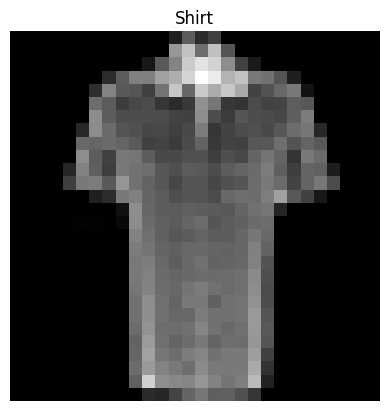

In [ ]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),(1,)).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False)

In [ ]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)
print(f"shape before flattening:{x.shape}\nshape after flatten:{output.shape}")

shape before flattening:torch.Size([1, 28, 28])
shape after flatten:torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)
model_0=FashionMNISTModelV0(input_shape=784,hidden_units=10,output_shape=len(class_name))
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [ ]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time=timer()
end_time=timer()
print_train_time(start=start_time,end=end_time,device=None)

Train time on None: 0.000 seconds


3.63289999825156e-05

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------")
  train_loss=0
  for batch,(x,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred=model_0(x)
    loss=loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  if batch%400==0:
    train_loss/=len(train_dataloader)
    print(f"Train loss:{train_loss}")
  train_loss/=len(train_dataloader)
  model_0.eval()
  test_loss, test_acc = 0, 0 # Initialize test_loss and test_acc
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      test_pred=model_0(x_test)
      test_loss+=loss_fn(test_pred,y_test) # Use += to accumulate loss
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
print(f"Train loss:{train_loss}\nTest loss:{test_loss}\nTest acc:{test_acc}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Epoch:1
-------
Epoch:2
-------
Train loss:0.0
Test loss:0.5126373767852783
Test acc:82.99720447284345


In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn ):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred=model(X)
      loss+=loss_fn(y_pred,y) # Accumulate the loss
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
  loss = loss / len(data_loader) # Calculate average loss outside inference mode
  acc = acc / len(data_loader) # Calculate average accuracy outside inference mode
  return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"model_acc":acc}

model_0_results=eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
              input_shape:int,
              hidden_units:int,
              output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,hidden_units=10,output_shape=len(class_name))
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
              input_shape:int,
              hidden_units:int,
              output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    x=self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_name))
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

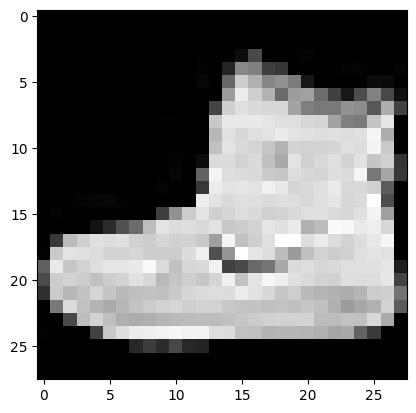

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")

In [ ]:
rand_image_tensor=torch.rand(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[-0.0674,  0.0113, -0.0397, -0.0799,  0.0208, -0.0443,  0.0298, -0.0164,
         -0.0238,  0.1132]], grad_fn=<AddmmBackward0>)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
test_image = torch.randn(3, 28, 28)
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=64,
                     kernel_size=(5,5),
                     stride=1,
                     padding=0)
conv_output=conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 64, 24, 24])

In [ ]:
print(f"Test image shape:{test_image.shape}")
max_pool_layer=nn.MaxPool2d(kernel_size=2)
test_image_through_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after conv:{test_image_through_conv.shape}")
test_image_through_maxpool=max_pool_layer(test_image_through_conv)
print(f"shape after maxpool:{test_image_through_maxpool.shape}")
test_image_through_conv_and_maxpool=max_pool_layer(test_image_through_conv)
print(f"shape after conv and maxpool:{test_image_through_conv_and_maxpool.shape}")

Test image shape:torch.Size([3, 28, 28])
shape after conv:torch.Size([1, 64, 24, 24])
shape after maxpool:torch.Size([1, 64, 12, 12])
shape after conv and maxpool:torch.Size([1, 64, 12, 12])


In [ ]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)


In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = None):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU


        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = None):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU


            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch}\n-----")
  train_step(model=model_2,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device=None)
  test_step(data_loader=test_dataloader,model=model_2,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=None)

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_on_cpu,end=train_time_end_model_2,device=None)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
-----
Train loss: 0.56002 | Train accuracy: 80.06%
Test loss: 0.38519 | Test accuracy: 86.50%

epoch:1
-----
Train loss: 0.35969 | Train accuracy: 87.00%
Test loss: 0.37872 | Test accuracy: 86.30%

epoch:2
-----
Train loss: 0.32312 | Train accuracy: 88.38%
Test loss: 0.33312 | Test accuracy: 88.15%

Train time on None: 137.740 seconds


In [ ]:
model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3323821425437927,
 'model_acc': 88.17891373801918}

In [ ]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
# Assuming model_1_results is calculated somewhere else, for example:
# model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)

# Now you can create the DataFrame
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results],
                               index=['model_0', 'model_1', 'model_2'])
# Added index for clarity
compare_results

,model_name,model_loss,model_acc
model_0,FashionMNISTModelV0,0.512530,83.007188
model_1,FashionMNISTModelV1,2.302022,10.772764
model_2,FashionMNISTModelV2,0.332382,88.178914


In [ ]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device=None):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=sample.unsqueeze(dim=0).to(device)
      pred_logit=model(sample)
      pred_prob=torch.softmax(pred_logit,dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

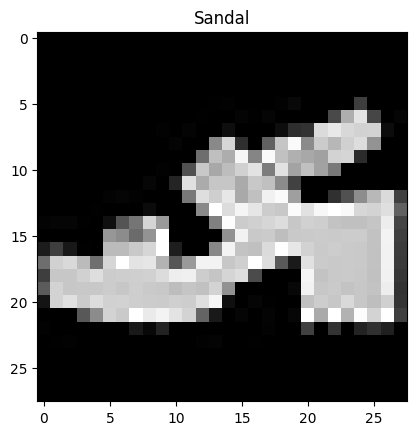

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_name[test_labels[0]])

In [ ]:
preds_probs=make_predictions(model=model_2,data=test_samples)
preds_probs[:2]

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]])

In [ ]:
pred_classes=preds_probs.argmax(dim=1)
pred_classes

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

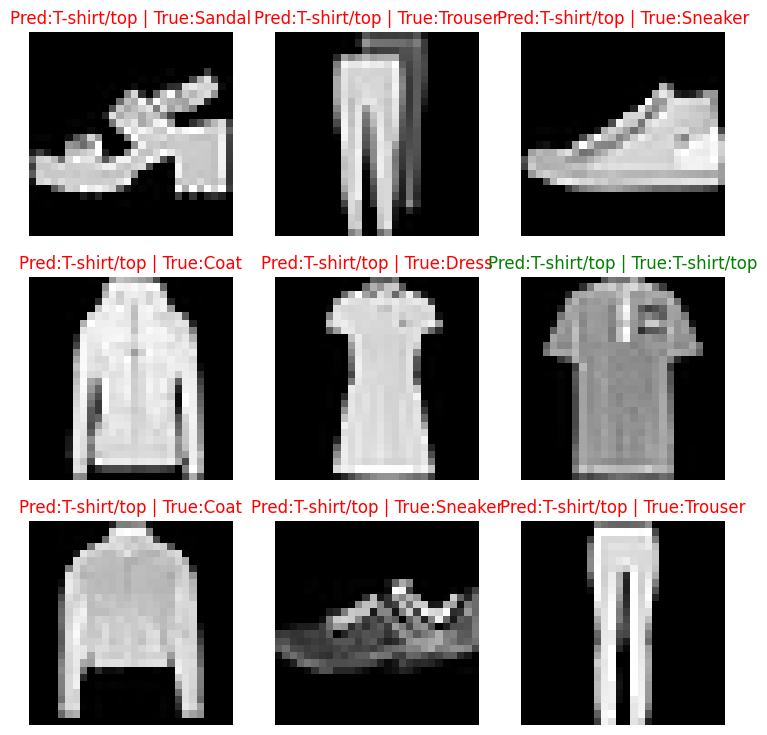

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  # Get the class with highest predicted probability
  pred_label=class_name[pred_classes[i].argmax().item()] # Use argmax to get index of highest probability class
  true_label=class_name[test_labels[i]]
  title_text=f"Pred:{pred_label} | True:{true_label}"
  if pred_label==true_label:
    plt.title(title_text,color="green")
  else:
    plt.title(title_text,color="red")
  plt.axis(False)

In [ ]:
from tqdm.auto import tqdm
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader):
    y_logits=model_2(X)
    y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]

  0%|          | 0/313 [00:00<?, ?it/s]

[tensor([3, 4, 1, 6, 7, 3, 0, 1, 2, 9, 9, 7, 4, 6, 6, 0, 9, 7, 7, 3, 4, 5, 6, 6,
        5, 2, 2, 8, 6, 0, 9, 7]), tensor([0, 1, 3, 5, 6, 5, 8, 9, 6, 2, 7, 7, 0, 2, 2, 2, 2, 0, 4, 3, 0, 7, 1, 3,
        3, 3, 4, 4, 6, 8, 4, 1]), tensor([1, 9, 4, 9, 4, 6, 1, 8, 8, 5, 8, 8, 7, 0, 1, 8, 2, 5, 2, 5, 6, 7, 2, 9,
        1, 4, 7, 7, 6, 5, 4, 3]), tensor([1, 1, 6, 0, 9, 4, 1, 1, 6, 2, 3, 2, 6, 7, 9, 0, 6, 2, 4, 7, 7, 2, 3, 1,
        3, 9, 1, 7, 6, 8, 6, 5]), tensor([8, 8, 1, 3, 4, 2, 2, 3, 2, 2, 6, 8, 9, 6, 6, 4, 9, 7, 0, 4, 1, 6, 4, 3,
        1, 8, 3, 4, 5, 8, 7, 5]), tensor([5, 3, 9, 7, 3, 6, 7, 8, 8, 3, 2, 1, 4, 4, 1, 5, 9, 4, 2, 2, 1, 3, 0, 9,
        6, 1, 3, 0, 6, 6, 4, 5]), tensor([9, 2, 8, 4, 7, 2, 4, 7, 0, 9, 1, 1, 4, 6, 1, 9, 3, 3, 2, 7, 2, 1, 3, 8,
        5, 0, 0, 7, 9, 2, 5, 3]), tensor([0, 0, 3, 6, 3, 8, 0, 6, 4, 7, 6, 5, 6, 6, 3, 1, 1, 1, 8, 3, 7, 7, 4, 2,
        4, 1, 5, 8, 9, 5, 8, 3]), tensor([5, 4, 5, 3, 9, 1, 5, 7, 4, 5, 2, 4, 3, 4, 5, 3, 0, 7, 5, 6, 9, 0, 2, 9,
       

tensor([3, 4, 1, 6, 7, 3, 0, 1, 2, 9])

In [ ]:
!pip install -q torchmetrics -U mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 22.2 MB/s eta 0:00:00


In [ ]:
import mlxtend

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Specify the task as "multiclass" since you are dealing with multiple classes
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_name))

confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
confmat_tensor

tensor([[ 71, 116,  83, 120, 121,  83, 124,  97,  85, 100],
        [ 84,  98,  88, 111, 117,  91, 110, 113,  86, 102],
        [ 80,  84,  88, 119, 106,  99, 130, 103, 102,  89],
        [ 83,  76,  95, 119, 104,  77, 147, 110,  91,  98],
        [ 97,  81, 107, 113, 114,  74, 123, 116,  85,  90],
        [ 75,  85,  99, 125,  98,  86, 108, 122, 100, 102],
        [ 81,  83, 107, 107, 115,  67, 115, 118, 117,  90],
        [ 82,  96,  79, 123, 103,  86, 116, 125,  87, 103],
        [ 84,  86,  98, 123,  85,  93, 114, 120,  93, 104],
        [ 86,  81,  94, 105, 102,  93, 121, 123, 104,  91]])

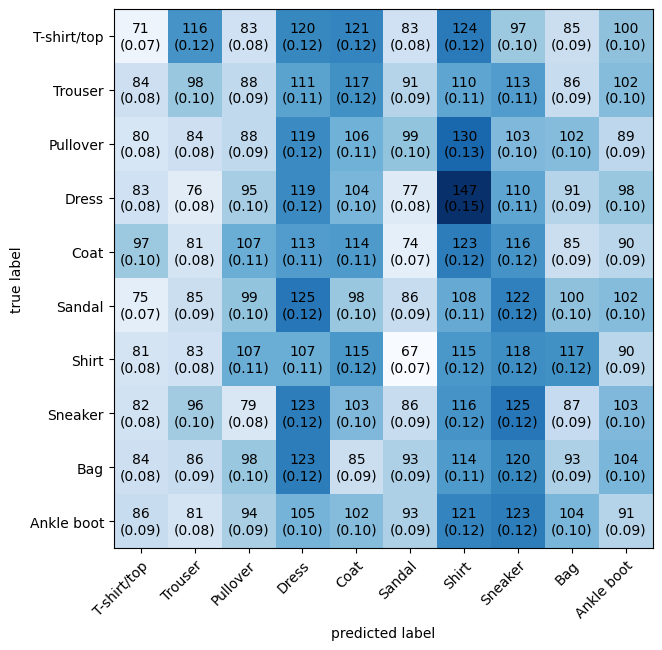

In [ ]:
fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    figsize=(10,7),
    class_names=class_name,
    show_normed=True
)

In [ ]:
from pathlib import Path
MODEL_PATH=Path("Models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="fashion_mnist_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)


In [ ]:
image_shape=[1,28,28]

In [ ]:
torch.manual_seed(42)
loaded_model_2=FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_name))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
model_2_results

<function __main__.eval_model(model: torch.nn.modules.module.Module, data_loader: torch.utils.data.dataloader.DataLoader, loss_fn: torch.nn.modules.module.Module, accuracy_fn)>

In [ ]:
torch.manual_seed(42)
loaded_model_2_results=eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3324296474456787,
 'model_acc': 88.16892971246007}